In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Question 1



Display data

In [3]:
# read data
p1_generate = pd.read_csv('./data/Plant_1_Generation_Data.csv')
p1_weather = pd.read_csv('./data/Plant_1_Weather_Sensor_Data.csv')

print(p1_generate.head())
print(p1_weather.head())

          DATE_TIME  PLANT_ID       SOURCE_KEY  DC_POWER  AC_POWER  \
0  15-05-2020 00:00   4135001  1BY6WEcLGh8j5v7       0.0       0.0   
1  15-05-2020 00:00   4135001  1IF53ai7Xc0U56Y       0.0       0.0   
2  15-05-2020 00:00   4135001  3PZuoBAID5Wc2HD       0.0       0.0   
3  15-05-2020 00:00   4135001  7JYdWkrLSPkdwr4       0.0       0.0   
4  15-05-2020 00:00   4135001  McdE0feGgRqW7Ca       0.0       0.0   

   DAILY_YIELD  TOTAL_YIELD  
0          0.0    6259559.0  
1          0.0    6183645.0  
2          0.0    6987759.0  
3          0.0    7602960.0  
4          0.0    7158964.0  
             DATE_TIME  PLANT_ID       SOURCE_KEY  AMBIENT_TEMPERATURE  \
0  2020-05-15 00:00:00   4135001  HmiyD2TTLFNqkNe            25.184316   
1  2020-05-15 00:15:00   4135001  HmiyD2TTLFNqkNe            25.084589   
2  2020-05-15 00:30:00   4135001  HmiyD2TTLFNqkNe            24.935753   
3  2020-05-15 00:45:00   4135001  HmiyD2TTLFNqkNe            24.846130   
4  2020-05-15 01:00:00   4135

merge data

In [4]:
p1_generate['DATE_TIME'] = pd.to_datetime(p1_generate['DATE_TIME'], format='mixed', dayfirst=True)
p1_weather['DATE_TIME'] = pd.to_datetime(p1_weather['DATE_TIME'], format='mixed', dayfirst=True)
plant1_data = pd.merge(p1_generate, p1_weather, on='DATE_TIME')
print(plant1_data.head())

   DATE_TIME  PLANT_ID_x     SOURCE_KEY_x  DC_POWER  AC_POWER  DAILY_YIELD  \
0 2020-05-15     4135001  1BY6WEcLGh8j5v7       0.0       0.0          0.0   
1 2020-05-15     4135001  1IF53ai7Xc0U56Y       0.0       0.0          0.0   
2 2020-05-15     4135001  3PZuoBAID5Wc2HD       0.0       0.0          0.0   
3 2020-05-15     4135001  7JYdWkrLSPkdwr4       0.0       0.0          0.0   
4 2020-05-15     4135001  McdE0feGgRqW7Ca       0.0       0.0          0.0   

   TOTAL_YIELD  PLANT_ID_y     SOURCE_KEY_y  AMBIENT_TEMPERATURE  \
0    6259559.0     4135001  HmiyD2TTLFNqkNe            25.184316   
1    6183645.0     4135001  HmiyD2TTLFNqkNe            25.184316   
2    6987759.0     4135001  HmiyD2TTLFNqkNe            25.184316   
3    7602960.0     4135001  HmiyD2TTLFNqkNe            25.184316   
4    7158964.0     4135001  HmiyD2TTLFNqkNe            25.184316   

   MODULE_TEMPERATURE  IRRADIATION  
0           22.857507          0.0  
1           22.857507          0.0  
2          

/var/folders/vq/b4771lhd7szfxw67rsm92kk40000gn/T/ipykernel_1377/1242486658.py:1: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  p1_generate['DATE_TIME'] = pd.to_datetime(p1_generate['DATE_TIME'])


# Linear Regression Model with R^2 and MSE

In [24]:
def create_features(df):
    df['YEAR'] = df['DATE_TIME'].dt.year
    df['MONTH'] = df['DATE_TIME'].dt.month
    df['DAY'] = df['DATE_TIME'].dt.day
    df['HOUR'] = df['DATE_TIME'].dt.hour
    df['MINUTE'] = df['DATE_TIME'].dt.minute
    df['DAYOFWEEK'] = df['DATE_TIME'].dt.dayofweek
    df['DATE'] = df['DATE_TIME'].dt.date
    df['TIME'] = df['DATE_TIME'].dt.time
    df['TOTAL_MINUTES_PASS'] = df['MINUTE'] + df['HOUR'] * 60
    return df

#load data and merge data
p1_generate = pd.read_csv('./data/Plant_1_Generation_Data.csv')
p1_weather = pd.read_csv('./data/Plant_1_Weather_Sensor_Data.csv')
p1_generate['DATE_TIME'] = pd.to_datetime(p1_generate['DATE_TIME'], format='mixed', dayfirst=True)
p1_weather['DATE_TIME'] = pd.to_datetime(p1_weather['DATE_TIME'], format='mixed', dayfirst=True)
plant1_data = pd.merge(p1_generate, p1_weather, on='DATE_TIME')
plant1_data = create_features(plant1_data)

features = ['YEAR', 'MONTH', 'DAY', 'HOUR', 'MINUTE', 'DAYOFWEEK', 'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION']
target = 'AC_POWER'

X_train, X_test, y_train, y_test = train_test_split(plant1_data[features], plant1_data[target], test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f'Training Mean Squared Error: {train_mse:.2f}')
print(f'Training R^2 Score: {train_r2:.2f}')
print(f'Testing Mean Squared Error: {test_mse:.2f}')
print(f'Testing R^2 Score: {test_r2:.2f}')

Training Mean Squared Error: 3292.75
Training R^2 Score: 0.98
Testing Mean Squared Error: 3064.69
Testing R^2 Score: 0.98


# Plot Actual Value VS Predicted Value

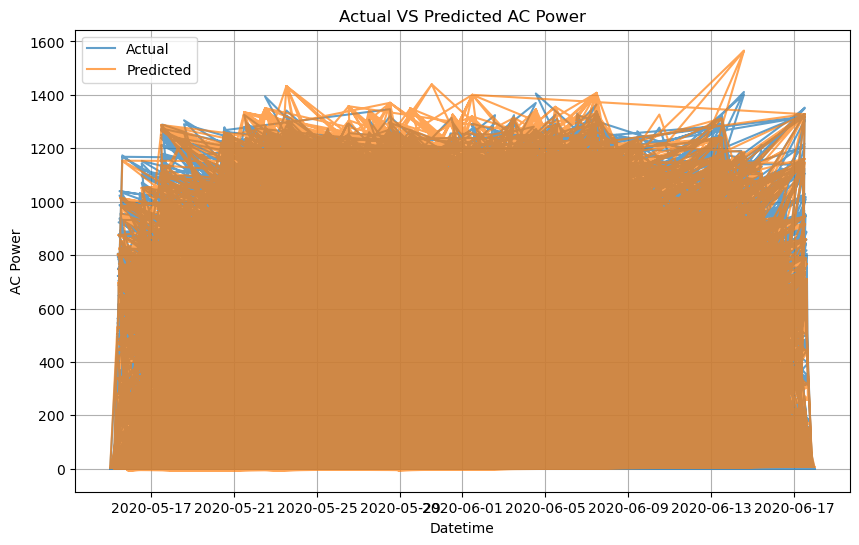

In [19]:
# find the date time base on index
X_test['DATE_TIME'] = plant1_data.loc[X_test.index, 'DATE_TIME']

# plot ac power based on test value and predict value
# I think test value should be used as the actual value as measure
plt.figure(figsize=(10, 6))
plt.plot(X_test['DATE_TIME'], y_test.values, label='Actual', alpha=0.7)
plt.plot(X_test['DATE_TIME'], y_pred_lr, label='Predicted', alpha=0.7)
plt.title('Actual VS Predicted AC Power')
plt.xlabel('Datetime')
plt.ylabel('AC Power')
plt.legend()
plt.grid(True)
plt.show()


# Use Ridge to prevent overfitting

In [7]:
from sklearn.linear_model import Ridge

r_model = Ridge(alpha=1.0)  
r_model.fit(X_train, y_train)
y_pred_r = r_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred_r)
r2 = r2_score(y_test, y_pred_r)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R² Score: {r2 * 100:.2f}%')

Mean Squared Error: 3066.33
R² Score: 98.01%


# Use Cross Validation to testify overfitting

In [8]:

cv_scores = cross_val_score(r_model, plant1_data[features], plant1_data[target], cv=5, scoring='r2')
cv_mean = cv_scores.mean()
cv_std = cv_scores.std()

print(f'Cross-Validation R² Score: {cv_mean:.2f} ± {cv_std:.2f}')

Cross-Validation R² Score: 0.98 ± 0.01


The R^2 score value is stable with standard error is small indicates there is less potential of overfitting.

# Prediction

In [9]:
future_dates = pd.date_range(start=plant1_data['DATE_TIME'].max(), periods=48, freq='h')
future_data = pd.DataFrame(future_dates, columns=['DATE_TIME'])
future_data = create_features(future_data)
# fill previous date weather
last_weather_conditions = plant1_data[['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION']].iloc[-1]
future_data['AMBIENT_TEMPERATURE'] = last_weather_conditions['AMBIENT_TEMPERATURE']
future_data['MODULE_TEMPERATURE'] = last_weather_conditions['MODULE_TEMPERATURE']
future_data['IRRADIATION'] = last_weather_conditions['IRRADIATION']

prev_day_ac_power = plant1_data['AC_POWER'].iloc[-24:].values
future_data['PREV_DAY_AC_POWER'] = [0]*24 + list(prev_day_ac_power)
future_predictions = lr.predict(future_data[features])
future_data['PREDICTED_AC_POWER'] = future_predictions
print(future_data[['DATE_TIME', 'PREDICTED_AC_POWER']])

             DATE_TIME  PREDICTED_AC_POWER
0  2020-06-17 23:45:00            7.245528
1  2020-06-18 00:45:00           11.399163
2  2020-06-18 01:45:00           11.193965
3  2020-06-18 02:45:00           10.988767
4  2020-06-18 03:45:00           10.783568
5  2020-06-18 04:45:00           10.578370
6  2020-06-18 05:45:00           10.373172
7  2020-06-18 06:45:00           10.167974
8  2020-06-18 07:45:00            9.962776
9  2020-06-18 08:45:00            9.757578
10 2020-06-18 09:45:00            9.552379
11 2020-06-18 10:45:00            9.347181
12 2020-06-18 11:45:00            9.141983
13 2020-06-18 12:45:00            8.936785
14 2020-06-18 13:45:00            8.731587
15 2020-06-18 14:45:00            8.526389
16 2020-06-18 15:45:00            8.321190
17 2020-06-18 16:45:00            8.115992
18 2020-06-18 17:45:00            7.910794
19 2020-06-18 18:45:00            7.705596
20 2020-06-18 19:45:00            7.500398
21 2020-06-18 20:45:00            7.295200
22 2020-06-